# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | vorkuta
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | mandi bahauddin
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | pauini
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | griffith
Processing Record 15 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | tucuma
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | quitilipi
Proces

Processing Record 40 of Set 4 | darwin
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | jaszkiser
Processing Record 43 of Set 4 | qinggang
Processing Record 44 of Set 4 | ingeniero jacobacci
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | fuglafjordur
Processing Record 47 of Set 4 | paracuru
Processing Record 48 of Set 4 | aral
Processing Record 49 of Set 4 | ardanuc
Processing Record 0 of Set 5 | crane
Processing Record 1 of Set 5 | tacurong
Processing Record 2 of Set 5 | pavlodar
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | panacan
Processing Record 5 of Set 5 | las veredas
Processing Record 6 of Set 5 | aykhal
Processing Record 7 of Set 5 | sabang
Processing Record 8 of Set 5 | salinopolis
Processing Record 9 of Set 5 | bardaskan
City not found. Skipping...
Processing Record 10 of Set 5 | daru
Processing Record 11 of Set 5 | fort stockton
Processing Record 12 of Set 5 | olonkinbyen
Processing Record 13 of Set

Processing Record 33 of Set 8 | miquelon
Processing Record 34 of Set 8 | nikolayevsk-on-amure
Processing Record 35 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 36 of Set 8 | road town
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | merikanjaka
City not found. Skipping...
Processing Record 39 of Set 8 | island harbour
Processing Record 40 of Set 8 | nar'yan-mar
Processing Record 41 of Set 8 | laascaanood
Processing Record 42 of Set 8 | ust-nera
Processing Record 43 of Set 8 | nyaunglebin
Processing Record 44 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 45 of Set 8 | shawnee
Processing Record 46 of Set 8 | puerto aysen
Processing Record 47 of Set 8 | sao joao da barra
Processing Record 48 of Set 8 | alofi
Processing Record 49 of Set 8 | acapulco de juarez
Processing Record 0 of Set 9 | ujae
Processing Record 1 of Set 9 | iguape
Processing Record 2 of Set 9 | saint-augustin-de-desmaures
Processing Record 3 of Set 9

Processing Record 20 of Set 12 | naracoorte
Processing Record 21 of Set 12 | zhangye
Processing Record 22 of Set 12 | sinabang
Processing Record 23 of Set 12 | tarko-sale
Processing Record 24 of Set 12 | ploudalmezeau
Processing Record 25 of Set 12 | arteche
Processing Record 26 of Set 12 | dalandzadgad
Processing Record 27 of Set 12 | emerald
Processing Record 28 of Set 12 | heihe
Processing Record 29 of Set 12 | ventspils
Processing Record 30 of Set 12 | luis correia
Processing Record 31 of Set 12 | nuuk
Processing Record 32 of Set 12 | bukama
Processing Record 33 of Set 12 | turochak
Processing Record 34 of Set 12 | kailua-kona
Processing Record 35 of Set 12 | togur
Processing Record 36 of Set 12 | belyayevka
Processing Record 37 of Set 12 | brisas barra de suchiate
Processing Record 38 of Set 12 | marka
Processing Record 39 of Set 12 | san luis
Processing Record 40 of Set 12 | olinda
Processing Record 41 of Set 12 | chililabombwe
Processing Record 42 of Set 12 | vilyuysk
Processing

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,279.35,66,98,1.79,US,1700589708
1,edinburgh of the seven seas,-37.0676,-12.3116,286.58,79,7,17.09,SH,1700589708
2,iqaluit,63.7506,-68.5145,258.47,95,70,1.95,CA,1700589708
3,thompson,55.7435,-97.8558,264.57,75,99,5.90,CA,1700589708
4,klyuchi,52.2667,79.1667,264.83,78,10,5.13,RU,1700589708


In [37]:
import os

# Create the output_data directory if it doesn't exist
output_data_dir = "output_data"
os.makedirs(output_data_dir, exist_ok=True)
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,279.35,66,98,1.79,US,1700589708
1,edinburgh of the seven seas,-37.0676,-12.3116,286.58,79,7,17.09,SH,1700589708
2,iqaluit,63.7506,-68.5145,258.47,95,70,1.95,CA,1700589708
3,thompson,55.7435,-97.8558,264.57,75,99,5.90,CA,1700589708
4,klyuchi,52.2667,79.1667,264.83,78,10,5.13,RU,1700589708


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

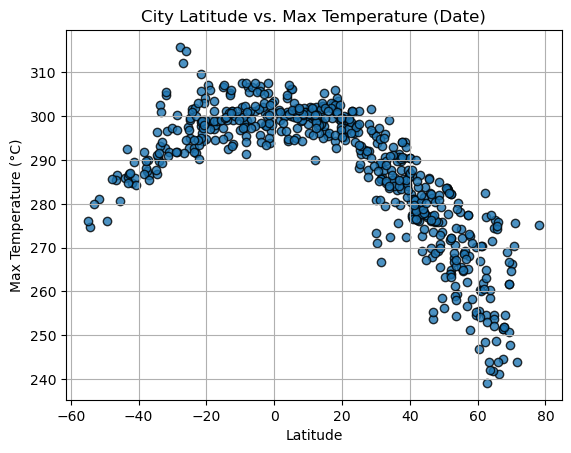

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

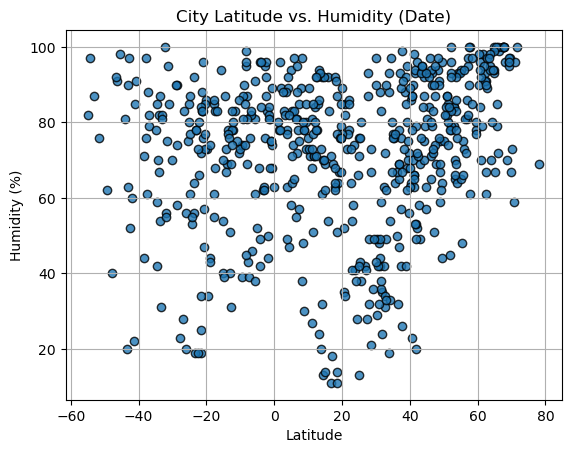

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

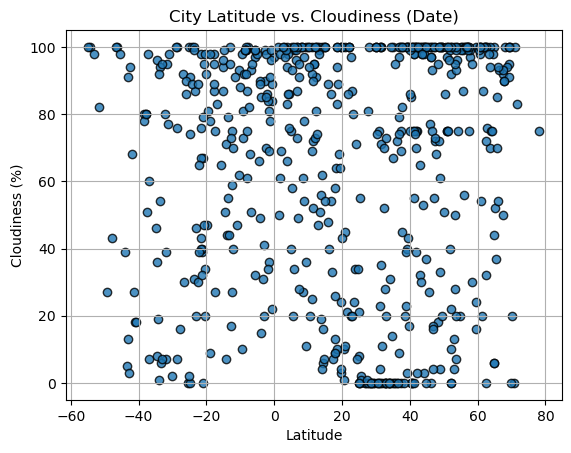

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

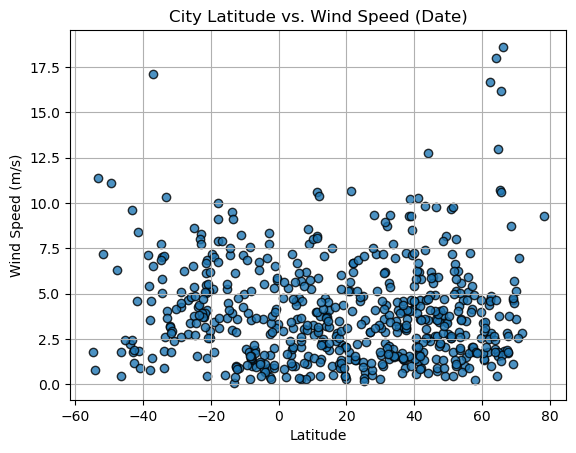

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,279.35,66,98,1.79,US,1700589708
2,iqaluit,63.7506,-68.5145,258.47,95,70,1.95,CA,1700589708
3,thompson,55.7435,-97.8558,264.57,75,99,5.90,CA,1700589708
4,klyuchi,52.2667,79.1667,264.83,78,10,5.13,RU,1700589708
5,vorkuta,67.5000,64.0000,251.51,100,92,2.81,RU,1700589139


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,286.58,79,7,17.09,SH,1700589708
6,waitangi,-43.9535,-176.5597,285.83,81,39,2.24,NZ,1700589521
8,grytviken,-54.2811,-36.5092,274.65,97,100,0.77,GS,1700589709
9,afaahiti,-17.7500,-149.2833,297.08,85,98,9.12,PF,1700589709
10,pauini,-7.7136,-66.9764,306.73,43,100,0.99,BR,1700589709


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8821209055174745


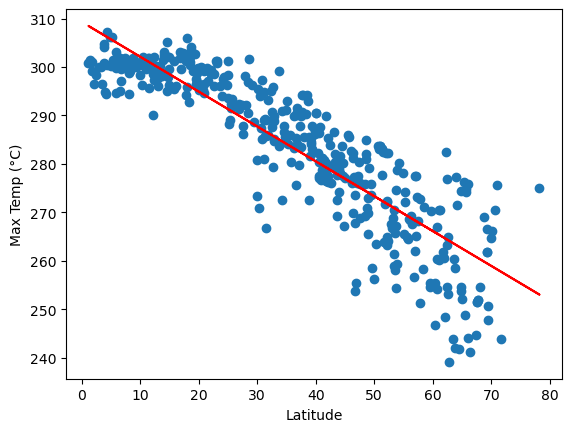

In [46]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp (°C)", (0,0))


The r-value is: 0.6720505653274795


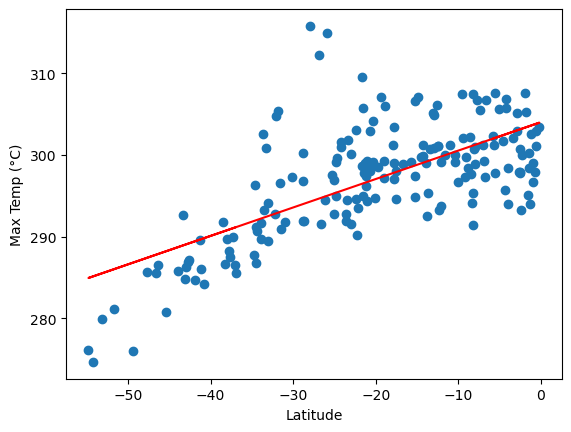

In [47]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (°C)", (0,0))


**Discussion about the linear relationship:** There is a moderate positive correlation between latitude and max temperature in the Northern Hemisphere.In the Southern Hemisphere, there is a weaker positive correlation between latitude and max temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2950177671054316


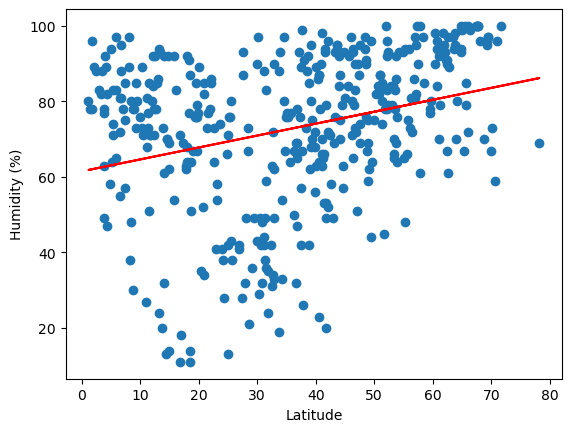

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (0,0))

The r-value is: 0.014421208993743056


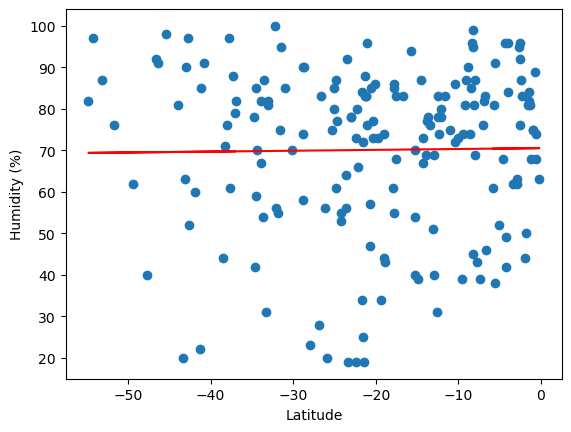

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (0,0))

**Discussion about the linear relationship:** There is a very weak positive correlation between latitude and humidity in both hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07974348003047596


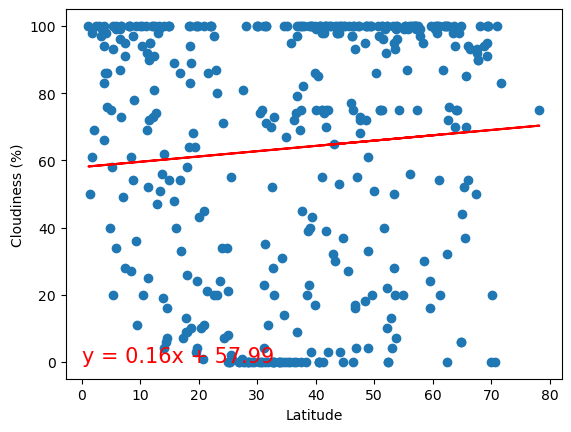

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (0,0))

The r-value is: 0.1799878342270763


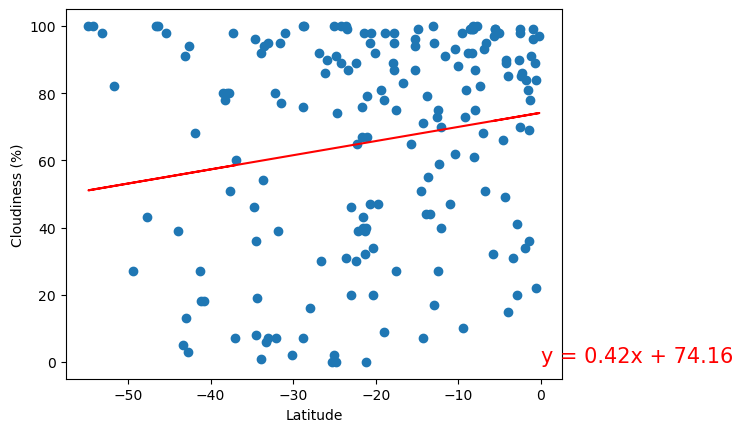

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (0,0))

**Discussion about the linear relationship:** There is a very weak positive correlation between latitude and cloudiness in both hemispheres.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10629900301094095


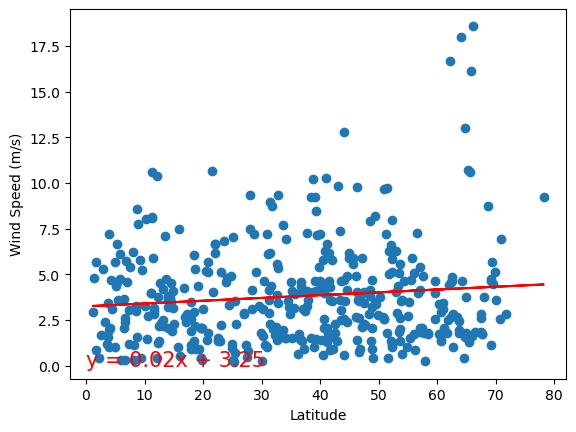

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (0,0))


The r-value is: -0.17810670148570112


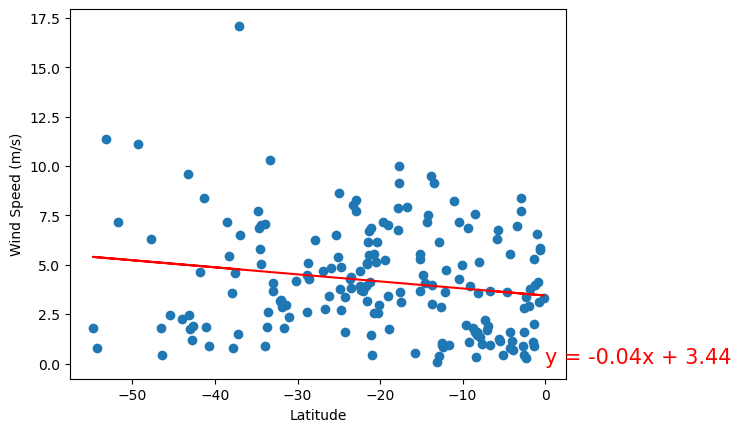

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (0,0))


**Discussion about the linear relationship:** There is a very weak positive correlation between latitude and wind speed in both hemispheres.